# 인공지능과 가위바위보 하기

## MNIST 숫자 손글씨 Dataset 불러들이기

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import os


print(tf.__version__)   # Tensorflow의 버전을 출력

mnist = keras.datasets.mnist

# MNIST 데이터를 로드. 다운로드하지 않았다면 다운로드까지 자동으로 진행됩니다. 
(x_train, y_train), (x_test, y_test) = mnist.load_data()   

print(len(x_train))  # x_train 배열의 크기를 출력

2022-08-02 16:48:22.426746: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-02 16:48:22.426771: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


2.9.1
60000


train과 test의 형태를 출력해봅시다.

In [2]:
print('x_train shape :', x_train.shape)
print('y_train shape :', y_train.shape)
print('x_test  shape :', x_test.shape)
print('y_test  shape :', y_test.shape)

x_train shape : (60000, 28, 28)
y_train shape : (60000,)
x_test  shape : (10000, 28, 28)
y_test  shape : (10000,)


이미지 하나 출력

color map 설정

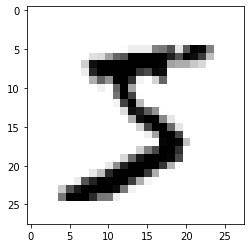

In [3]:
plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()

In [4]:
print(y_train[0])

5


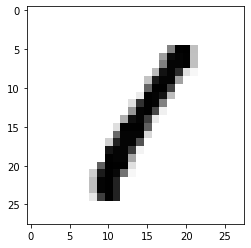

4 번째 이미지의 숫자는 바로  1 입니다.


In [5]:
# index에 0에서 59999 사이 숫자를 지정해 보세요.
index=3
plt.imshow(x_train[index],cmap=plt.cm.binary)
plt.show()
print( (index+1), '번째 이미지의 숫자는 바로 ',  y_train[index], '입니다.')

## 데이터 전처리

최소값, 최대값

In [6]:
print('최소값:',np.min(x_train), ' 최대값:',np.max(x_train))

최소값: 0  최대값: 255


0 ~ 1 정규화

In [7]:
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0
print('최소값:',np.min(x_train_norm), ' 최대값:',np.max(x_train_norm))

최소값: 0.0  최대값: 1.0


## 딥러닝 네트워크 설계

tf.keras의 Sequential API를 이용하여 LeNet이라는 딥러닝 네트워크를 설계  
keras는 크게 sequential이랑 functional로 나뉨  

In [8]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

Model에 추가된 Layer 개수:  7


2022-08-02 16:48:25.157411: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-02 16:48:25.157795: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-02 16:48:25.157840: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-08-02 16:48:25.157874: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-08-02 16:48:25.157913: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

딥러닝 네트워크 모델 확인

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 32)                2

## 딥러닝 네트워크 학습

위에서 input shape가 (28,28,1) 이였으므로 우리의 data도 마지막 1인 채널 값을 넣어주자

In [10]:
print("Before Reshape - x_train_norm shape: {}".format(x_train_norm.shape))
print("Before Reshape - x_test_norm shape: {}".format(x_test_norm.shape))

x_train_reshaped=x_train_norm.reshape( -1, 28, 28, 1)  # 데이터갯수에 -1을 쓰면 reshape시 자동계산됩니다.
x_test_reshaped=x_test_norm.reshape( -1, 28, 28, 1)

print("After Reshape - x_train_reshaped shape: {}".format(x_train_reshaped.shape))
print("After Reshape - x_test_reshaped shape: {}".format(x_test_reshaped.shape))

Before Reshape - x_train_norm shape: (60000, 28, 28)
Before Reshape - x_test_norm shape: (10000, 28, 28)
After Reshape - x_train_reshaped shape: (60000, 28, 28, 1)
After Reshape - x_test_reshaped shape: (10000, 28, 28, 1)


학습 epochs = 10, 10번 반복해서 학습

In [11]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_reshaped, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.2015 - accuracy: 0.9397
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0651 - accuracy: 0.9800
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0474 - accuracy: 0.9855
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0367 - accuracy: 0.9888
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0291 - accuracy: 0.9908
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0238 - accuracy: 0.9924
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0204 - accuracy: 0.9937
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0176 - accuracy: 0.9944
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0138 - accuracy: 0.9952
Epoch 10/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.

## 성능 확인

model.evaluate 사용

In [12]:
test_loss, test_accuracy = model.evaluate(x_test_reshaped,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

313/313 - 1s - loss: 0.0400 - accuracy: 0.9890 - 677ms/epoch - 2ms/step
test_loss: 0.040004175156354904 
test_accuracy: 0.9890000224113464


model.predict 사용

In [13]:
predicted_result = model.predict(x_test_reshaped)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

313/313 [==============================] - 1s 2ms/step
model.predict() 결과 :  [3.0877409e-10 2.8345704e-08 1.6084732e-07 1.8626453e-07 1.0439661e-12
 1.2019139e-12 3.8913071e-15 9.9999958e-01 7.5484632e-09 3.5043424e-08]
model이 추론한 가장 가능성이 높은 결과 :  7
실제 데이터의 라벨 :  7


진짜 7인가요?

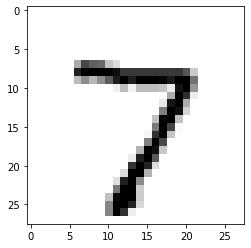

In [14]:
plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()

그럼, 추론 값과 실제 값이 다른 경우는?

예측확률분포: [2.5451767e-08 9.9719638e-01 2.1456190e-05 6.0777197e-09 4.4928106e-06
 4.5359394e-10 2.7774004e-03 6.4734391e-09 1.0124482e-07 3.7996020e-11]
라벨: 6, 예측결과: 1


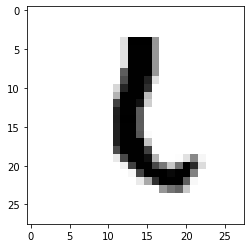

예측확률분포: [4.7904729e-07 2.0341268e-03 9.2307889e-01 8.3332630e-09 7.4511178e-02
 7.6788545e-08 3.5559462e-04 1.9657455e-05 4.5396455e-08 4.6176421e-14]
라벨: 4, 예측결과: 2


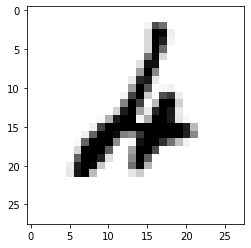

예측확률분포: [8.5292757e-01 7.9954728e-13 7.0031845e-08 1.1848565e-05 8.3291474e-10
 3.0910922e-04 3.4052769e-03 2.2011450e-09 1.4334606e-01 5.7984229e-10]
라벨: 8, 예측결과: 0


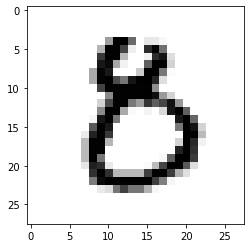

예측확률분포: [4.7904729e-07 2.0341268e-03 9.2307889e-01 8.3332630e-09 7.4511178e-02
 7.6788545e-08 3.5559462e-04 1.9657455e-05 4.5396455e-08 4.6176421e-14]
라벨: 4, 예측결과: 2


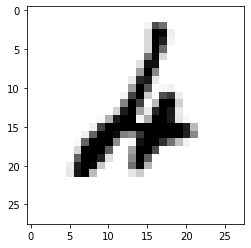

예측확률분포: [3.5004567e-07 3.6190398e-04 1.8166563e-08 4.7236139e-07 1.0890299e-01
 1.9475119e-05 2.8000393e-09 2.9924066e-05 7.3132384e-01 1.5936098e-01]
라벨: 9, 예측결과: 8


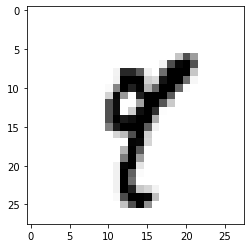

In [15]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

## 더 좋은 네트워크 만들기

더 좋게 만들기 위해 하이퍼 파라미터들을 바꿔봅시다.

In [16]:
# # 바꿔 볼 수 있는 하이퍼파라미터들
# n_channel_1=16
# n_channel_2=32
# n_dense=32
# n_train_epoch=10

# model=keras.models.Sequential()
# model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,1)))
# model.add(keras.layers.MaxPool2D(2,2))
# model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
# model.add(keras.layers.MaxPooling2D((2,2)))
# model.add(keras.layers.Flatten())
# model.add(keras.layers.Dense(n_dense, activation='relu'))
# model.add(keras.layers.Dense(10, activation='softmax'))

# model.summary()a
# model.compile(optimizer='adam',
#              loss='sparse_categorical_crossentropy',
#              metrics=['accuracy'])

# # 모델 훈련 
# model.fit(x_train_reshaped, y_train, epochs=n_train_epoch)

# # 모델 시험
# test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
# print("test_loss: {} ".format(test_loss))
# print("test_accuracy: {}".format(test_accuracy))

In [17]:
# # 바꿔 볼 수 있는 하이퍼파라미터들
# n_channel_1=16
# n_channel_2=32
# n_dense=32
# n_train_epoch=10

def mnist_predict(n_channel_1 = 16, n_channel_2=32 , n_dense=32, n_train_epoch=10):
    model=keras.models.Sequential()
    model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,1)))
    model.add(keras.layers.MaxPool2D(2,2))
    model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
    model.add(keras.layers.MaxPooling2D((2,2)))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(n_dense, activation='relu'))
    model.add(keras.layers.Dense(10, activation='softmax'))

    model.summary()
    model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

    # 모델 훈련 
    model.fit(x_train_reshaped, y_train, epochs=n_train_epoch)

    # 모델 시험
    test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
    print(n_channel_1, n_channel_2, n_dense, n_train_epoch, ": test_loss: {} ".format(test_loss))
    print(n_channel_1, n_channel_2, n_dense, n_train_epoch, ": test_accuracy: {}".format(test_accuracy))

In [18]:
mnist_predict(32,48,64,15)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 48)        13872     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 48)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1200)              0         
                                                                 
 dense_2 (Dense)             (None, 64)               

In [ ]:
mnist_predict(64,64,128,8)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dense_4 (Dense)             (None, 128)              

(16, 32, 32, 10) = 0.9909  
(32, 48, 64, 15) = 0.9919
(64, 64, 128, 8) = 0.9911